In [62]:
from forest import data_generation
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import kernelCompare as kc
import numpy as np
import random


## Maximum Mean Discrepancy

The code implements the two sample test from the paper：
> Gretton, A., Borgwardt, K. M., Rasch, M. J., Schölkopf, B., & Smola, A. (2012). A kernel two-sample test. Journal of Machine Learning Research, 13(Mar), 723-773.


Test the difference between two samples:
- $X_1, \cdots, X_{n_X}\sim P$ and 
- $Y_1, \cdots, Y_{n_Y}\sim Q$. 

Intuitively, if $P=Q$, then for any $f$ we expect that
$$
\mathbb{E}_X f(X) = \mathbb{E}_Y f(Y).
$$


The work of Gretton (2012) tests the whether the distributions of $X$ and $Y$ are the same by computing the ***maximum mean discrepancy (MMD)***
$$
\text{MMD}^2[\mathcal{F}, p,q] = \sup_{f\in\mathcal{F}} \big(\mathbb{E}_X f(X) - \mathbb{E}_Y f(Y) \big).
$$

- The function $f$ is in a reproducing kernel Hilbert space $\mathcal{F}$. 
- An kernel $k(\cdot, \cdot)$ associated with $\mathcal{F}$.


An equivalent representation of MMD  
$$
\begin{align*}
&\text{MMD}^2[\mathcal{F}, p,q]\\
=& \mathbb{E}_{X,X'} k(X,X') +  \mathbb{E}_{Y,Y'} k(Y,Y') - 
2\mathbb{E}_{X,Y} k(X,Y). \\
\approx & \frac{1}{n_X-1}\sum_{i=1}^{N_X} k(X_i,X_{i+1})+
\frac{1}{n_Y-1}\sum_{i=1}^{N_Y} k(Y_i,Y_{i+1})-
2\frac{1}{p}\sum_{i=1}^p k(X_i,Y_{i}),
\end{align*}
$$
with $p = \min\{n_X, n_Y\}$.



- The optimal function $f^*$  is called the ***witness function***. 
$$
f^*(z) = \frac{1}{n_X}\sum_{i=1}^{n_X} k(z,X_i)-
 \frac{1}{n_Y}\sum_{i=1}^{n_Y} k(z,Y_i).
$$


### How to obtain p-value?



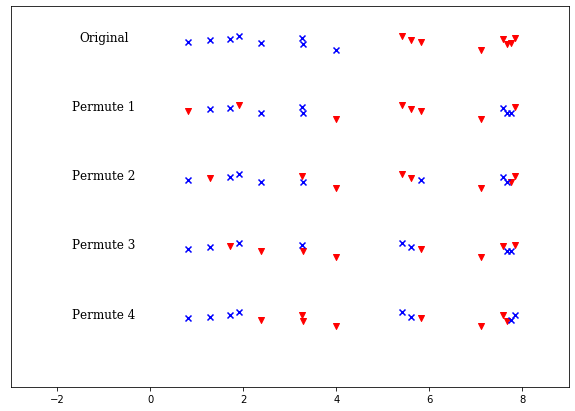

In [74]:
np.random.seed(0)
dataD = np.array([0.5,0.5,0.5,1.5,2.5,2.5,2.5,2.5]).reshape((8,)) + np.random.normal(scale = 0.8,size = (8,))
dataD2 = np.array([0.5,0.5,0.5,1.5,1.5,2.5,2.5,2.5]).reshape((8,)) + np.random.normal(scale = 0.8,size = (8,))+5
y =  np.random.normal(size = (8,),scale = 0.05,)
dataD = np.hstack((dataD,dataD2))
y = np.hstack((y,y))

sel = np.repeat(True,16)
sel[:8] = False

plt.figure(figsize=(10,7))
for i in range(5):
    plt.scatter(dataD[sel],y[sel]-i,c="red",marker = "v")
    plt.scatter(dataD[np.logical_not(sel)],y[np.logical_not(sel)]-i,c="blue",marker = "x")
    sel = random.sample(list(sel),k=16)
    txtf = "Original"
    if i > 0:
        txtf = "Permute " + str(i)
    plt.text(-1,-i,txtf,ha='center',fontdict = dict(size = 12, family= 'serif'))



plt.ylim(-0.5,0.5)
plt.yticks([])
plt.xlim(-3,9)
plt.ylim(-5,0.5)
plt.show()

## Examples

### Eg. 1

Both $X_1,\cdots, X_{900}$ and $Y_1,\cdots, Y_{900}$ comes from the same distribution
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
where
$$
\boldsymbol{\mu}_1 = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_2 = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_3 = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$

100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


MMD statistics is 0.001167
The p-value of the test is 0.395000


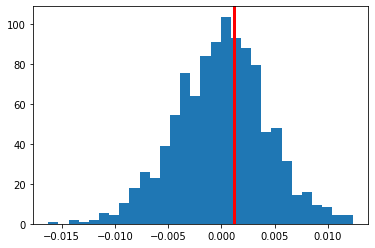

In [2]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n2 = [300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n2)
Y = data_generation(mean1, cov1, n2)

obj = kc.kernelCompare(X, Y)
MMD, pValue = obj.compute(iterations=1000,plot = True)
print("MMD statistics is %f" % MMD)
print("The p-value of the test is %f" % pValue)

### Eg. 2

The first group $X_1,\cdots, X_{900}$  comes from (a missing component)
$$
(1/2)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(0)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/2)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
and the second group  $Y_1,\cdots, Y_{900}$ comes from
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
where
$$
\boldsymbol{\mu}_1 = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_2 = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_3 = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$

100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


MMD statistics is 0.002562
The p-value of the test is 0.279000


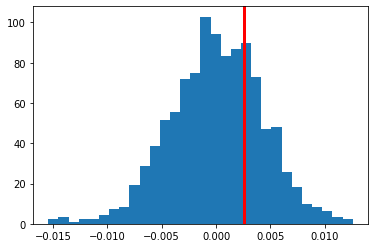

In [3]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n1 = [450, 0, 450]
n2 = [300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n1)
Y = data_generation(mean1, cov1, n2)

obj = kc.kernelCompare(X, Y)
MMD, pValue = obj.compute(iterations=1000, plot = True)
print("MMD statistics is %f" % MMD)
print("The p-value of the test is %f" % pValue)

### Eg. 3
Given the mixed distribution
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
The first group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{X1} = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X2} = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X3} = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$
The second group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{Y1} = \begin{pmatrix}
1\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y2} = \begin{pmatrix}
1\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y3} = \begin{pmatrix}
3\\1\\4\\5\end{pmatrix}.
$$

100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


MMD statistics is 0.002295
The p-value of the test is 0.307000


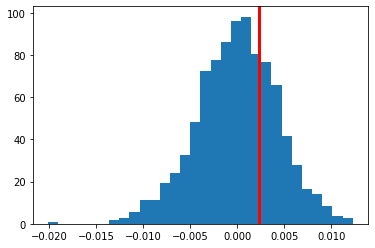

In [4]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
mean2 = [[1, 0, 0, 0], 
         [1, 10, 3, 0], 
         [3, 1, 4, 5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n2 = [300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n2)
Y = data_generation(mean2, cov1, n2)

obj = kc.kernelCompare(X, Y)
MMD, pValue = obj.compute(iterations=1000, plot = True)
print("MMD statistics is %f" % MMD)
print("The p-value of the test is %f" % pValue)


### Eg. 4
Given the mixed distribution
$$
(1/3)N(\boldsymbol{\mu}_1,\mathbf{\Sigma}_1)+
(1/3)N(\boldsymbol{\mu}_2,\mathbf{\Sigma}_2)+
(1/3)N(\boldsymbol{\mu}_3,\mathbf{\Sigma}_3),
$$
The first group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{X1} = \begin{pmatrix}
0\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X2} = \begin{pmatrix}
0\\10\\3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{X3} = \begin{pmatrix}
2\\1\\4\\5\end{pmatrix}.
$$
The second group $X_1,\cdots, X_{900}$ has mean vectors
$$
\boldsymbol{\mu}_{Y1} = \begin{pmatrix}
1\\0\\0\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y2} = \begin{pmatrix}
1\\-10\\-3\\0\end{pmatrix},\quad
\boldsymbol{\mu}_{Y3} = \begin{pmatrix}
3\\-1\\-4\\-5\end{pmatrix}.
$$

100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


MMD statistics is 0.014910
The p-value of the test is 0.001000


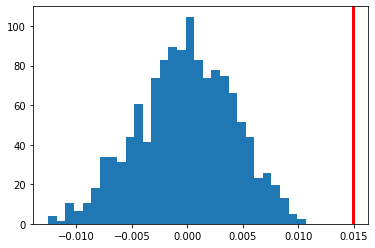

In [6]:
mean1 = [[0, 0, 0, 0], 
         [0, 10, 3, 0], 
         [2, 1, 4, 5]]
mean2 = [[1, 0, 0, 0], 
         [1, -10, -3, 0], 
         [3, -1, -4, -5]]
cov1 = [[[10, 0, 0, 0], [0, 80, 0, 0], [0, 0, 30, 0], [0, 0, 0, 50]], 
        [[10, 1, 1, 1], [1, 80, 1, 1], [1, 1, 30, 1], [1, 1, 1, 50]],
        [[10, -3, -2, -2], [-3, 80, -2, -2], [-2, -2, 30, -2], [-2, -2, -2, 50]]]
n2 = [300, 300, 300, 300, 300]

np.random.seed(0)
X = data_generation(mean1, cov1, n2)
Y = data_generation(mean2, cov1, n2)

obj = kc.kernelCompare(X, Y)
MMD, pValue = obj.compute(iterations=1000,plot = True)
print("MMD statistics is %f" % MMD)
print("The p-value of the test is %f" % pValue)


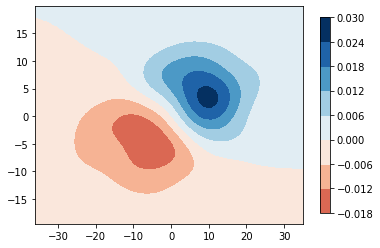

In [9]:
obj.plotDiff(coord1=0,coord2=1)

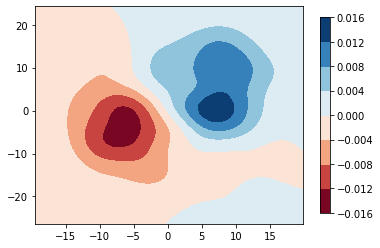

In [11]:
obj.plotDiff(coord1=2,coord2=3)